In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

import generate_vectors

In [85]:
weather_data = generate_vectors.WSData("data/weather_mctavish.csv")

In [86]:
def nan_helper(x):
    """Helper to handle indices and logical indices of NaN arrays."""
    return np.isnan(x), lambda y: y.nonzero()[0]

In [87]:
# remove NaNs by interpolation
nans, y = nan_helper(weather_data.data["mean_temperature"])

#TODO bad practise because don't understand the error
weather_data.data["mean_temperature"][nans] = \
    np.interp(y(nans), y(~nans), weather_data.data["mean_temperature"][~nans])

Text(0, 0.5, 'Mean temperature (degrees C)')

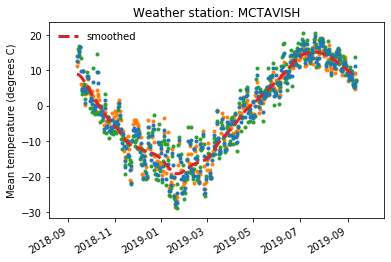

In [64]:
fig = plt.figure()

mean_baseline = np.nanmedian(weather_data.data["mean_temperature"])
min_baseline = np.nanmedian(weather_data.data["min_temperature"])
max_baseline = np.nanmedian(weather_data.data["max_temperature"])

plt.scatter(weather_data.data["local_date"][-365:],
            weather_data.data["mean_temperature"][-365:] - mean_baseline,
            zorder=2, marker=".")
plt.scatter(weather_data.data["local_date"][-365:],
            weather_data.data["min_temperature"][-365:] - min_baseline,
            marker=".", zorder=1)
plt.scatter(weather_data.data["local_date"][-365:],
            weather_data.data["max_temperature"][-365:] - max_baseline,
            marker=".", zorder=1)

plt.plot(weather_data.data["local_date"][-365:],
         scipy.ndimage.gaussian_filter1d(
             weather_data.data["mean_temperature"][-365:] - mean_baseline,
             10.0, order=0), zorder=3, color="tab:red",
         lw=3, ls="--", label="smoothed")

fig.autofmt_xdate()

plt.legend(frameon=False)
plt.title("Weather station: {}".format(np.unique(weather_data.data["station_name"])[0]))
plt.ylabel("Mean temperature (degrees C)")

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


Text(0, 0.5, 'Total precipitation (mm)')

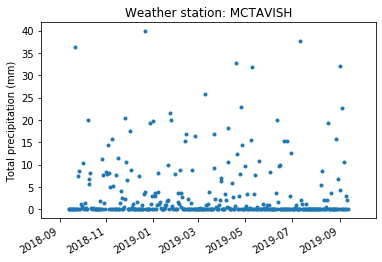

In [88]:
fig = plt.figure()

mean_baseline = np.nanmedian(weather_data.data["total_precipitation"])

plt.scatter(weather_data.data["local_date"][-365:],
            weather_data.data["total_precipitation"][-365:] - mean_baseline,
            zorder=2, marker=".")

fig.autofmt_xdate()

plt.legend(frameon=False)
plt.title("Weather station: {}".format(np.unique(weather_data.data["station_name"])[0]))
plt.ylabel("Total precipitation (mm)")